## Image Processing: Prototype 0

### Logic flow notebook:
* take two imgs (car and no_car)
* clean them (flip and grayscale)
* define regions where cars exist (regions of interest) - just squares for now
* slice the two imgs using regions of interest
* flatten the resultant matrix for analysis
* compute summary stats for both car and no_car
* determine a decent way to distiguish between car and no_car


In [22]:
# imports
import os
import sys

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage 
from skimage import io, color, exposure



In [5]:
# consts
nc_path = '/Users/nikhilarora/dev/github/fydp-codebase/data/no_cars.JPG' # no cars 
c_path = '/Users/nikhilarora/dev/github/fydp-codebase/data/cars.JPG' # cars
m_path = '/Users/nikhilarora/dev/github/fydp-codebase/data/mixed.JPG' # cars and empty spots

# 

In [6]:
# util functions:

## cleaning functions

def rev_img(img):
    """reverse img"""
    rev_img = []
    for item in reversed(img):
        rev_cols = []
        for col in reversed(item):
            rev_cols.append(col)
        rev_img.append(rev_cols)
    return np.asarray(rev_img)

def rgb_2_gray(img):
    """converts rgb to grayscale"""
    return np.uint8(color.rgb2gray(img) * 255)

def pre_proc_img(img):
    """Wrapper to store all image cleaning logic"""
    img = rev_img(img)
    img = rgb_2_gray(img)
    return img


In [7]:
# pull images into ndarrays and apply cleaning methods on them

nc_img = pre_proc_img(io.imread(nc_path))
c_img = pre_proc_img(io.imread(c_path))
io.imsave('/Users/nikhilarora/dev/github/fydp-codebase/data/cars_cleaned.png',c_img)
m_img = pre_proc_img(io.imread(m_path))

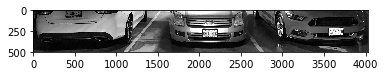

In [9]:
# ispect the images visually:
plt.imshow(c_img[1750:2250], cmap='gray')

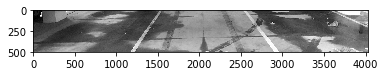

In [10]:
# ispect the images visually:
plt.imshow(nc_img[1750:2250], cmap='gray')

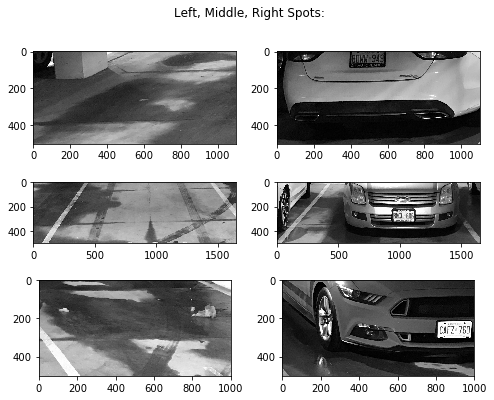

In [11]:
# define regions where cars exist (regions of interest) - TODO: just squares for now - use vertices after
left_spot_nc = nc_img[1750:2250,0:1100]
left_spot_c = c_img[1750:2250,0:1100]
mid_spot_nc = nc_img[1750:2250,1100:2750]
mid_spot_c = c_img[1750:2250,1100:2750]
right_spot_nc = nc_img[1750:2250,2750:3750]
right_spot_c = c_img[1750:2250,2750:3750]

#plot:

f, ax = plt.subplots(3, 2, figsize=(8, 6))
f.suptitle('Left, Middle, Right Spots:')

ax[0,0].imshow(left_spot_nc, cmap="gray")
ax[0,1].imshow(left_spot_c, cmap="gray")

ax[1,0].imshow(mid_spot_nc, cmap="gray")
ax[1,1].imshow(mid_spot_c, cmap="gray")

ax[2,0].imshow(right_spot_nc, cmap="gray")
ax[2,1].imshow(right_spot_c, cmap="gray")


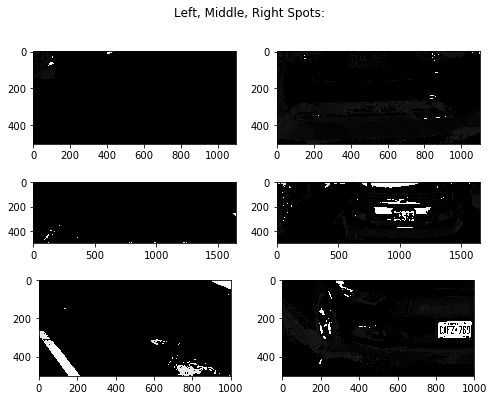

In [41]:
# try threshholding the images at 0-25, 225-255
left_spot_nc = nc_img[1750:2250,0:1100] 
left_spot_nc[(left_spot_nc > 25) & (left_spot_nc < 225)] = 0

left_spot_c = c_img[1750:2250,0:1100] 
left_spot_c[(left_spot_c > 25) & (left_spot_c < 225)] = 0

mid_spot_nc = nc_img[1750:2250,1100:2750]
mid_spot_nc[(mid_spot_nc > 25) & (mid_spot_nc < 225)] = 0
mid_spot_c = c_img[1750:2250,1100:2750]  
mid_spot_c[(mid_spot_c > 25) & (mid_spot_c < 225)] = 0

right_spot_nc = nc_img[1750:2250,2750:3750]
right_spot_nc[(right_spot_nc > 25) & (right_spot_nc < 225)] = 0

right_spot_c = c_img[1750:2250,2750:3750] 
right_spot_c[(right_spot_c > 25) & (right_spot_c < 225)] = 0

#plot:

f, ax = plt.subplots(3, 2, figsize=(8, 6))
f.suptitle('Left, Middle, Right Spots:')

ax[0,0].imshow(left_spot_nc, cmap="gray")
ax[0,1].imshow(left_spot_c, cmap="gray")

ax[1,0].imshow(mid_spot_nc, cmap="gray")
ax[1,1].imshow(mid_spot_c, cmap="gray")

ax[2,0].imshow(right_spot_nc, cmap="gray")
ax[2,1].imshow(right_spot_c, cmap="gray")

In [42]:
# flatten the resultant matrix for analysis
# compute summary stats for both car and no_car
print('Left no car:\n',stats.describe(left_spot_nc.flatten()))
print('Mid no car:\n',stats.describe(mid_spot_nc.flatten()))
print('Right no car:\n',stats.describe(right_spot_nc.flatten()))

Left no car:
 DescribeResult(nobs=550000, minmax=(0, 255), mean=0.60963454545454543, variance=88.725988859149993, skewness=24.90726637569977, kurtosis=643.8718268498806)
Mid no car:
 DescribeResult(nobs=825000, minmax=(0, 253), mean=0.54502666666666666, variance=126.03499082352018, skewness=20.57182242250286, kurtosis=421.5534864126667)
Right no car:
 DescribeResult(nobs=500000, minmax=(0, 254), mean=10.786766, variance=2476.2626097864641, skewness=4.407000058942203, kurtosis=17.471034731491606)


In [43]:
print('Left car:\n',stats.describe(left_spot_c.flatten()))
print('Mid car:\n',stats.describe(mid_spot_c.flatten()))
print('Right car:\n',stats.describe(right_spot_c.flatten()))

Left car:
 DescribeResult(nobs=550000, minmax=(0, 255), mean=4.6153963636363633, variance=141.27102780840096, skewness=14.208888414713346, kurtosis=280.06661688145016)
Mid car:
 DescribeResult(nobs=825000, minmax=(0, 255), mean=17.092157575757575, variance=3483.8228570695428, skewness=3.6171545409264194, kurtosis=11.216546354637577)
Right car:
 DescribeResult(nobs=500000, minmax=(0, 255), mean=11.583600000000001, variance=1890.7511965423935, skewness=5.1657270989716375, kurtosis=25.361878274472563)


(array([  5.47000000e+03,   8.52200000e+03,   1.32700000e+04,
          1.70960000e+04,   1.81110000e+04,   1.65810000e+04,
          1.39270000e+04,   1.23190000e+04,   1.11770000e+04,
          9.97300000e+03,   9.24500000e+03,   8.47300000e+03,
          7.76000000e+03,   7.34900000e+03,   6.97900000e+03,
          6.69400000e+03,   6.47500000e+03,   6.45400000e+03,
          6.16100000e+03,   5.89100000e+03,   5.48800000e+03,
          4.97100000e+03,   4.51600000e+03,   4.13800000e+03,
          3.36800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

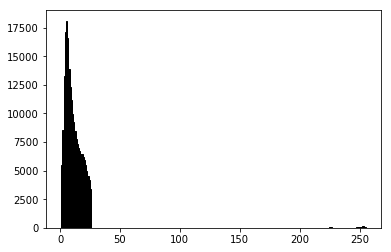

In [52]:
plt.hist(left_spot_c.flatten(), 256, range=(1,255), fc='k', ec='k')

(array([  3346.,   4715.,   6116.,   8052.,  10609.,  12304.,  13156.,
         12194.,  10212.,   7985.,   6087.,   4757.,   3968.,   3923.,
          3758.,   3687.,   3598.,   3407.,   3282.,   3267.,   3451.,
          3387.,   3563.,   4285.,   4084.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

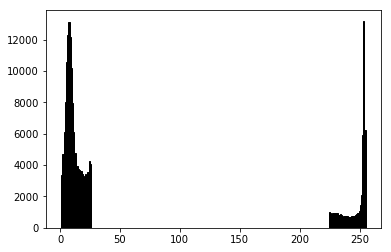

In [51]:
plt.hist(mid_spot_c.flatten(), 256, range=(1,255), fc='k', ec='k')

(array([ 5048.,  6180.,  7732.,  9310.,  9714.,  9655.,  8960.,  8276.,
         7457.,  6589.,  6022.,  5763.,  5809.,  5971.,  6320.,  6287.,
         6132.,  5619.,  5307.,  5021.,  4771.,  4487.,  4366.,  4487.,
         3952.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

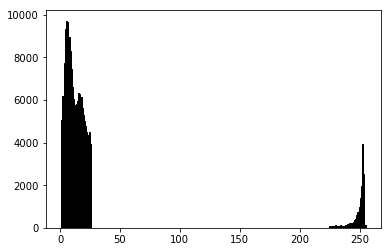

In [50]:
plt.hist(right_spot_c.flatten(), 256, range=(1,255), fc='k', ec='k')

(array([ 181.,  322.,  517.,  673.,  768.,  808.,  798.,  732.,  750.,
         649.,  657.,  613.,  588.,  548.,  478.,  435.,  390.,  385.,
         368.,  331.,  314.,  284.,  306.,  297.,  307.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

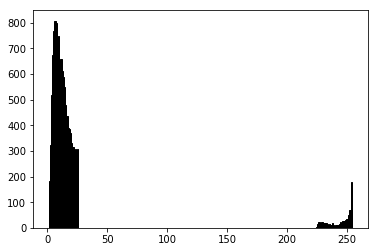

In [53]:
plt.hist(left_spot_nc.flatten(), 256, range=(1,255), fc='k', ec='k')

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           1.,    0.,    0.,    0.,    3.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

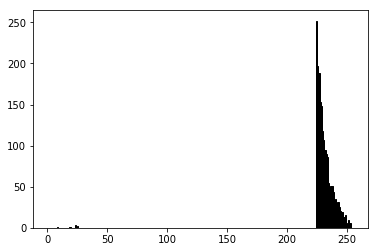

In [55]:
plt.hist(mid_spot_nc.flatten(), 256, range=(1,255), fc='k', ec='k')

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

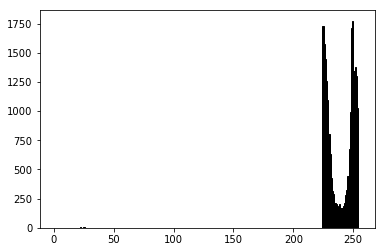

In [54]:
plt.hist(right_spot_nc.flatten(), 256, range=(1,255), fc='k', ec='k')

### Notes on licence plate detection software:

NOTE: can use the following licence plate detection software to detect if car exists or not. 

https://github.com/openalpr/openalpr

provides outputs like this:

* left car:
```unix
Nikhils-MacBook-Pro:docker nikhilarora$ docker run -it --rm -v $(pwd):/data:ro openalpr -c eu left_single_car.png 
libdc1394 error: Failed to initialize libdc1394
plate0: 10 results
    - BDWW949	 confidence: 84.5631
    - BDWW99	 confidence: 82.3271
    - BDWW94S	 confidence: 77.8426
    - BDWW94	 confidence: 76.5823
    - BDWW9S	 confidence: 75.6065
    - BDWWS49	 confidence: 75.5718
    - BDWW94B	 confidence: 75.5653
    - B0WW949	 confidence: 75.2688
    - BOWW949	 confidence: 74.9946
    - GDWW949	 confidence: 74.5434
```

* middle car:
```unix
Nikhils-MacBook-Pro:docker nikhilarora$ docker run -it --rm -v $(pwd):/data:ro openalpr -c eu mid_single_car.png 
libdc1394 error: Failed to initialize libdc1394
No license plates found.
```

* right car:
```unix
Nikhils-MacBook-Pro:docker nikhilarora$ docker run -it --rm -v $(pwd):/data:ro openalpr -c eu right_single_car.png 
libdc1394 error: Failed to initialize libdc1394
plate0: 10 results
    - CAFZ7G0	 confidence: 87.5995
    - CAFZ760	 confidence: 85.639
    - CAFZ7GD	 confidence: 84.8605
    - CAFZ76D	 confidence: 82.9
    - CAFZ7GO	 confidence: 82.2707
    - CAFZ7B0	 confidence: 82.1125
    - CAFZ7GQ	 confidence: 81.9227
    - CAFZ7S0	 confidence: 81.7682
    - CAFZ76O	 confidence: 80.3103
    - CAFZ76Q	 confidence: 79.9622
```

## Summary:

* two methods were attempted:
  1. parking spot licence plate detection
  2. parking spot (flattened ndarray) summary stats comparisions against empty spot 
  
* results:
  1. worked for two out of three cars in test, will need to test more with actual device to determine accuracy 
  2. in theory, should work well but with wet parking spots, makes results hard to classify. 

* hypothesis:
  1. middle car was hard to determine since the licence plate was dirty.
  2. should work well when parking spots are dry.
* questions:
  1. Could use both approaches above for a combined result.  They should both  
  
* NOTE: need to collect much more data with the actual device get a better idea of what will and will not work...

### Meeting notes: 

* should also use a depth sensor
  * time of flight 
  * US sensors

* following concept of sensor fusion tech. 

